# Movile Next - Aula 1 (Regressão)

In [3]:
import pandas as pd

pl_df = pd.read_csv("premier_league.csv")
pl_df.head()

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
0,Alexis Sanchez,Arsenal,28,LW,1,65.0,4329,12.0,17.10%,264,3.0,Chile,0,4,1,1,0
1,Mesut Ozil,Arsenal,28,AM,1,50.0,4395,9.5,5.60%,167,2.0,Germany,0,4,1,1,0
2,Petr Cech,Arsenal,35,GK,4,7.0,1529,5.5,5.90%,134,2.0,Czech Republic,0,6,1,1,0
3,Theo Walcott,Arsenal,28,RW,1,20.0,2393,7.5,1.50%,122,1.0,England,0,4,1,1,0
4,Laurent Koscielny,Arsenal,31,CB,3,22.0,912,6.0,0.70%,121,2.0,France,0,4,1,1,0


### Para gerar um modelo precisamos separar as colunas em features (X) e target (Y)

In [4]:
features = ["fpl_value"]
X = pl_df[features]
y = pl_df["market_value"]

### Para análise da performance de um modelo em aprendizagem supervisionada nós devemos separar os dados em treino e teste

- **Treino**: será usado para gerar o nosso modelo
- **Teste**: usado para validar se a nossa previsão foi correta

In [9]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X,y,
                                               test_size=0.3,
                                               random_state=0)

### Se a gente olhar um gráfico 2D com apenas uma feature

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


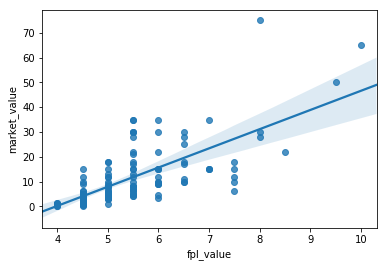

In [13]:
%matplotlib inline
import seaborn as sns

data = pd.concat([xtest,ytest], axis=1)

sns.regplot("fpl_value", "market_value", data=data, ci=68)

## Vamos gerar o nosso modelo

### Primeiro definimos qual modelo iremos usar

In [28]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

### Vamos gerar o modelo treinando ele

In [29]:
regressor.fit(xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### Vamos aplicar esse modelo gerado aos dados que separamos para validar

In [32]:
pred = regressor.predict(xtest)

### Um modelo de regressão retorna um coeficiente de inclinação para cada feature

In [45]:
for idx, col_name in enumerate(xtrain.columns):
    print("Coeficiente da feature {} é {}".format(col_name,
                                               regressor.coef_[idx]))

Coeficiente da feature fpl_value é 7.040974634593953


In [44]:
regressor.intercept_

-27.484407625539543

### Com essas informações podemos construir a equação da reta

Y = 

### Vamos analisar a performance usando o R2

#### R2 = 1 - (RSS/TSS)
- O RSS (soma residual dos quadrados) mede a variabilidade deixada inexplicada após a execução da regressão
- O TSS mede a variância total em Y
- Portanto, a estatística R2 mede a proporção de variabilidade em Y que é explicada por X usando nosso modelo

In [47]:
regressor.score(xtest, ytest)

0.5087984600507325

#### Também podemos obter o erro quadrático médio usando o método mean_squared_error do scikit-learn e comparar a previsão para o conjunto de dados de teste (dados não usados para treinamento) com a verdade básica do conjunto de testes de dados.

In [49]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(pred,ytest)
mse, mse**0.5

(69.93866768633669, 8.362934155327105)

In [59]:
regressor.predict([[12.0]])

array([57.00728799])

## Desafio: Otimize o modelo, aumente o score!

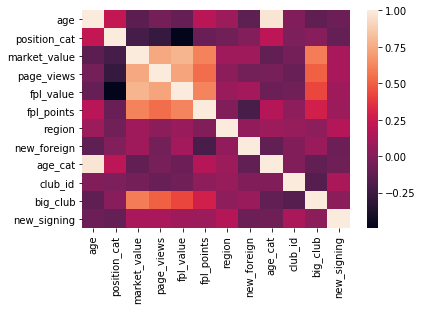

In [79]:
corr = pl_df.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [80]:
# 0.5087984600507325
from sklearn.preprocessing import MinMaxScaler

#scaler = MinMaxScaler()

features = ["fpl_value"]

new_features = ["page_views","position_cat","fpl_value","fpl_points","big_club"]
features.extend(new_features)

X = pl_df[features]
y = pl_df["market_value"]
#X = scaler.fit_transform(X)

xtrain, xtest, ytrain, ytest = train_test_split(X,y,
                                               test_size=0.3,
                                               random_state=0)

regressor.fit(xtrain, ytrain)
pred = regressor.predict(xtest)
regressor.score(xtest, ytest)

0.694458654016348

## Equação da Reta

**y = βx + a**